In [2]:
#packages
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import random
import math as a

In [3]:
path="USA_Housing.csv"
dataset=pd.read_csv(path)

In [4]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:

dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


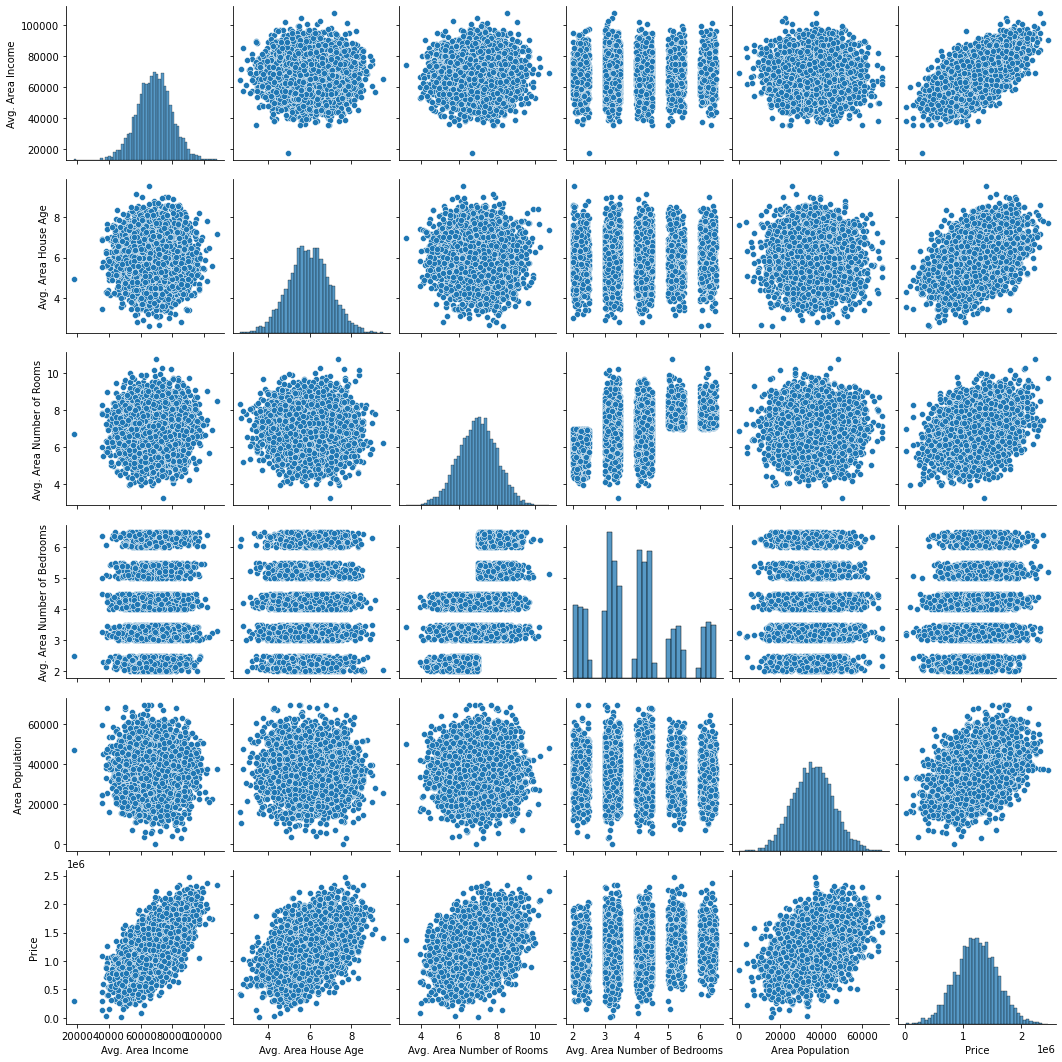

In [8]:
#visualisation des données 
sns.pairplot(dataset)

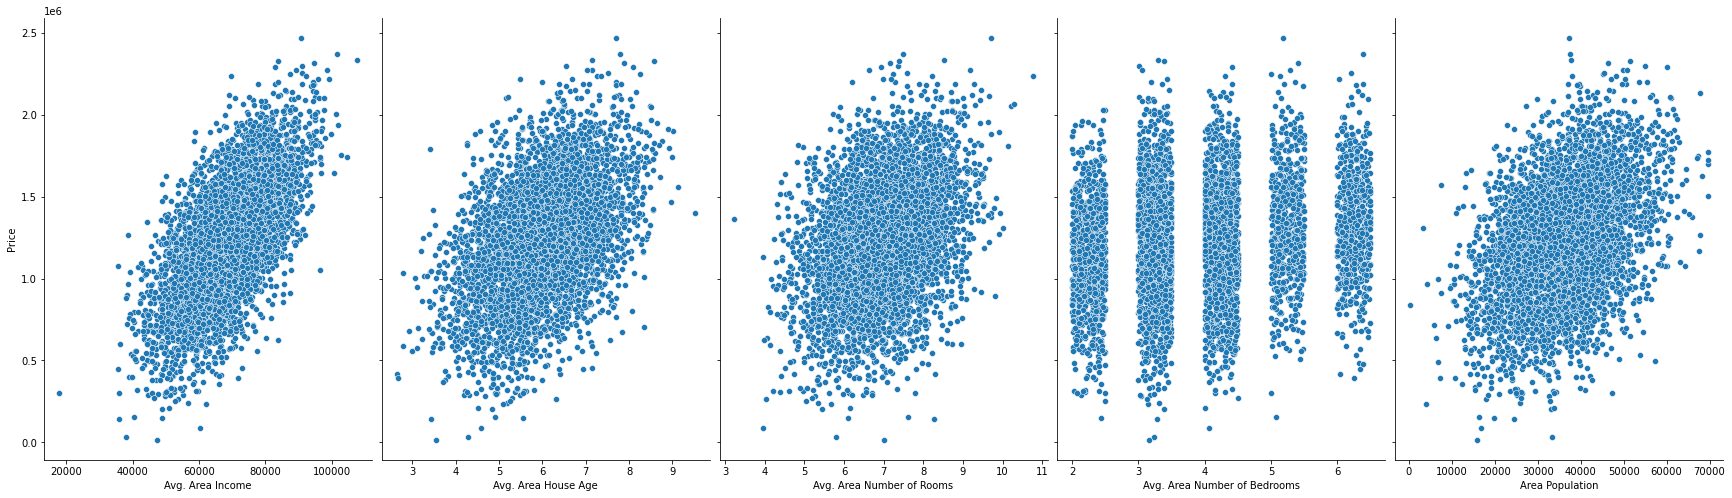

In [9]:
# Visualise the relationship between the features and the response using scatterplots
#j'ai choisi des variables qui me paraisse interresant à étudier
sns.pairplot(dataset, x_vars=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'], 
             y_vars='Price',height=7, aspect=0.7, kind='scatter')

<AxesSubplot:>

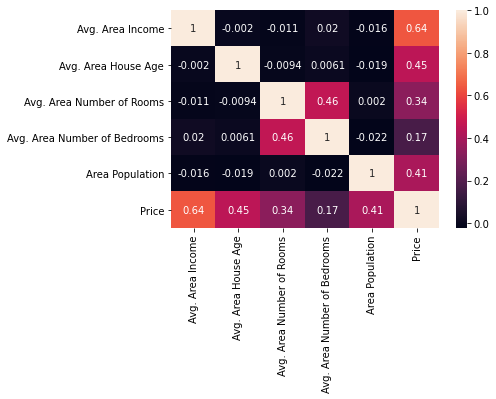

In [10]:
sns.heatmap(dataset.corr(),annot=True)

#covvariance


C:\Users\kafan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

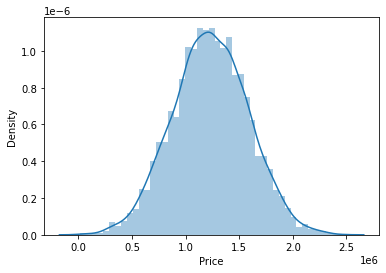

In [11]:


sns.distplot(dataset.Price)


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [104]:
# Putting feature variable to X
x = dataset[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms']]

# Putting response variable to y
y = dataset['Price']
#taille de de la matrice Theta 
taille=4

In [105]:
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms
0,79545.458574,5.682861,7.009188
1,79248.642455,6.002900,6.730821
2,61287.067179,5.865890,8.512727
3,63345.240046,7.188236,5.586729
4,59982.197226,5.040555,7.839388
...,...,...,...
4995,60567.944140,7.830362,6.137356
4996,78491.275435,6.999135,6.576763
4997,63390.686886,7.250591,4.805081
4998,68001.331235,5.534388,7.130144


In [106]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()
x = pd.DataFrame(pre_process.fit_transform(x))


(5000, 3)
(5000, 1)
(5000, 4)


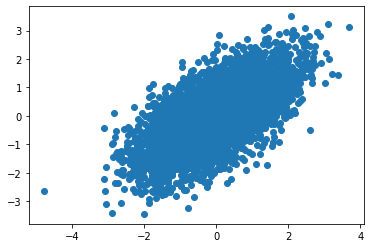

In [107]:
#1-dataset
print(x.shape)
#y anormal
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y=scaler.fit_transform(pd.DataFrame(y))

#y=y.values.reshape(y.shape[0],1)
print(y.shape)

x=np.hstack((x,np.ones((x.shape[0],1))))
print(x.shape)

#visualiser
plt.scatter(x[:,0],y)


In [108]:
y

array([[-0.49008146],
       [ 0.77550829],
       [-0.49021053],
       ...,
       [-0.570244  ],
       [-0.0946402 ],
       [ 0.18941143]])

In [109]:
x

array([[ 1.02865969, -0.29692705,  0.02127433,  1.        ],
       [ 1.00080775,  0.02590164, -0.25550611,  1.        ],
       [-0.68462916, -0.11230283,  1.5162435 ,  1.        ],
       ...,
       [-0.48723454,  1.28447022, -2.17026949,  1.        ],
       [-0.05459152, -0.44669439,  0.14154061,  1.        ],
       [-0.28831272,  0.01521477, -0.19434166,  1.        ]])

In [110]:
from sklearn.linear_model import LinearRegression
h=LinearRegression()
h.fit(x,y)
h.coef_

#h.predict(X)


array([[0.64448003, 0.45710831, 0.34708389, 0.        ]])

In [111]:
nbr=1
theta=abs(np.random.randn(taille,1)*nbr)
theta


array([[1.27039599],
       [0.53951472],
       [1.9274432 ],
       [0.73741146]])

In [112]:
def model(X,theta):
    
    return X.dot(theta)
    

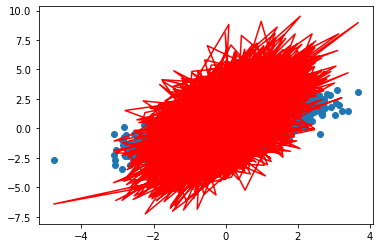

In [113]:
#test
plt.plot(x[:,0],model(x,theta),"r")
plt.scatter(x[:,0],y)

<ipython-input-114-336ba1610cea>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection = '3d')


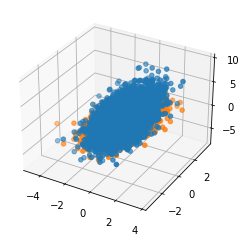

In [114]:
plt.scatter(x[:,1],model(x,theta))
#plt.plot(x[:,0],Y,"r")
ax = plt.axes(projection = '3d')
ax.scatter3D(x[:,0],x[:,1],model(x,theta))
#ax2 = plt.axes(projection = '3d')
ax.scatter3D(x[:,0],x[:,1],y,"r")

In [115]:
def cost_fct(x,y,theta):
    m=len(y)
    return 1/(2*m)* np.sum((model(x,theta)-y)**2)

In [116]:
cost_fct(x,y,theta)

1.839862671496608

In [117]:
#gadient


In [161]:
#solution satistifaisante pour evaluer les solutions
def coef_deter(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

def satisfaisante(y,pred):
    if(coef_deter(y,pred)<=1 and coef_deter(y,pred)>=0.7):
        return 1
    else:
        return 0

In [162]:
#in individu c'est la solution pour donc contient les Bi et la valeur de la fonction cout de la solution
class Individu:
     def __init__(self, solution):
        self.solution = solution
        self.fitness_value = 0
    
     def __str__(self):
        return "solution"+self.solution
        

In [163]:
#generate individu
def gen_ind():
    ind=Individu( abs(np.random.randn(taille,1)*nbr))
    return ind


In [164]:
#generate population
def gen_pop(n):
    return [gen_ind() for _ in range(n)]


In [165]:
#selection par tournoi
def selection(pop,taille):
    best=pop[random.randint(0,len(pop)-1)]
    for i in range (taille):
        nextp=pop[random.randint(0,len(pop)-1)]
        if(cost_fct(x,y,best.solution)>cost_fct(x,y,nextp.solution)):
            best=nextp
    return best

In [166]:
#cross over
def cross_over(ind1,ind2):
    c=random.randint(0,len(ind1.solution)-1)
    for i in range(c):
        temp=ind1.solution[i,0]
        ind1.solution[i,0]=ind2.solution[i,0]
        ind2.solution[i,0]=temp
    return ind1,ind2
    
    
    

In [167]:
#mutation
def mutation(ind,proba):
    for i in range(len(ind.solution)-1):
        if(random.random()<proba):
            ind.solution[i]=10+ind.solution[i]
    return ind

In [168]:
def genetic_algo(x,y,theta,popsize,n,n_max):
    best=theta
    n_iterations=0
    #pop initial
    pop=gen_pop(popsize)
    Q=[]
    while( satisfaisante(y,model(x,best))==False ):
        n_iterations+=1
        if(n_iterations>n_max):
            break
        for ind in pop:
            ind.fitness_value=cost_fct(x,y,ind.solution)
        #trier
            
        pop.sort(key=lambda x: x.fitness_value)
            
        if(  cost_fct(x,y,pop[0].solution)< cost_fct(x,y,best)):
            best=pop[0].solution
            print("///")
            print(best)
        #selection des n meilleurs parents 
        Q=pop[:n]
        
       
        #cross over
        
        for i in range(int((len(pop)-n)/2)):
            pa=selection(pop,2)
            pb=selection(pop,2)
            ind1,ind2=cross_over(pa,pb)
            Q.append(ind1)
            Q.append(ind2)
 

            
        P=Q
    return best
    
            
            
            
        
        
            
        
            
            
        
        
        
        
        
    
    
    

In [169]:
#ML produire theta
best=genetic_algo(x,y,theta,100,50,20)
print("ok")
print(best)


///
[[0.57193564]
 [0.25474804]
 [0.1236919 ]
 [0.07036155]]
///
[[0.56780749]
 [0.65163623]
 [0.14235415]
 [0.06033867]]
///
[[0.57193564]
 [0.25474804]
 [0.25941441]
 [0.11459035]]
///
[[1.01494021]
 [0.21740605]
 [0.36814824]
 [0.07838047]]
///
[[0.55312395]
 [0.23356834]
 [0.55250513]
 [0.07036155]]
///
[[0.57193564]
 [0.50245289]
 [0.18455993]
 [0.17715491]]
///
[[0.44230194]
 [0.39128758]
 [0.59053254]
 [0.17938321]]
///
[[0.64687787]
 [0.42072571]
 [0.41360605]
 [0.31339964]]
///
[[0.75184225]
 [0.23356834]
 [0.55616692]
 [0.04866291]]
///
[[0.56780749]
 [0.34516376]
 [0.37865113]
 [0.07838047]]
ok
[[0.56780749]
 [0.34516376]
 [0.37865113]
 [0.07838047]]


In [152]:
#on peut jouer sur les valeurs pour cherhcher uen bonne solution

In [170]:
theta_final=best
theta_final

array([[0.56780749],
       [0.34516376],
       [0.37865113],
       [0.07838047]])

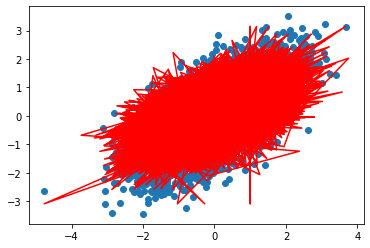

In [171]:
#test
plt.plot(x,model(x,theta_final),"r")
plt.scatter(x[:,0],y)

#on voit un emsemble de droite convrant presque tout les points 

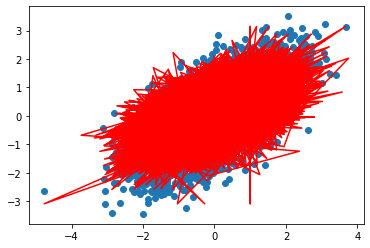

In [172]:
#affichage en points
plt.plot(x,model(x,theta_final),"r")
plt.scatter(x[:,0],y)
 

<ipython-input-173-ff4b9c4fd757>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection = '3d')


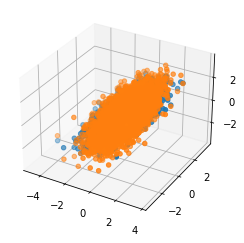

In [173]:
plt.scatter(x[:,1],model(x,theta_final))
#plt.plot(x[:,0],Y,"r")
ax = plt.axes(projection = '3d')
ax.scatter3D(x[:,0],x[:,1],model(x,theta_final))
#ax2 = plt.axes(projection = '3d')
ax.scatter3D(x[:,0],x[:,1],y,"r")

In [174]:
#performance avec coeeficient de determination

In [175]:
#ML produire theta
best=genetic_algo(x,y,theta,10000,500,50)
print("ok")
print(best)


///
[[0.66082783]
 [0.45329238]
 [0.27258518]
 [0.00516911]]
///
[[0.6955402 ]
 [0.4621959 ]
 [0.39743166]
 [0.01493747]]
ok
[[0.6955402 ]
 [0.4621959 ]
 [0.39743166]
 [0.01493747]]


<ipython-input-176-d1815e84a8a4>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection = '3d')


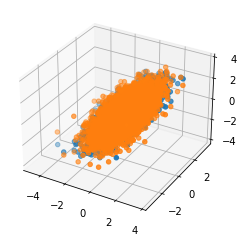

In [176]:
plt.scatter(x[:,1],model(x,best))
#plt.plot(x[:,0],Y,"r")
ax = plt.axes(projection = '3d')
ax.scatter3D(x[:,0],x[:,1],model(x,best))
#ax2 = plt.axes(projection = '3d')
ax.scatter3D(x[:,0],x[:,1],y,"r")